<a href="https://www.kaggle.com/code/thamaraliz/basic-eda-world-happiness-report-2019?scriptVersionId=96853270" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Dataset [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness )

**Thamara Liz Gabuardi**

# Introduction

The World Happiness Report became a popular topic in 2012 when Bhutan announced it would be using GNH (Gross National happiness) rather than the GDP (gross domestic product) to measure the nation's well-being [(Guardian, 2012)](https://www.theguardian.com/world/2012/dec/01/bhutan-wealth-happiness-counts).

The index uses several factors to assess the happiness of nations. They are:

1. GDP per Capita: The GDP per capita level of a country.
2. Social Support: The impact of a supportive social circle, i.e., the positive impact of having relatives or friends.
3. Healthy Life Expectancy: The average life expectancy for healthy individuals.
4. Freedom to Make Life Choices: The positive impact of a population's freedom of choice.
5. Generosity: The population's overall level of generosity.
6. Perceptions of Corruption: The level of trust in business and government.


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Available files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


# Data Loading

We will take a look at the 2019 (most recent) report. 

In [3]:
# Load raw data
original_data = pd.read_csv("/kaggle/input/world-happiness/2019.csv")

# Good practice: work with a copy of the dataset, not the original one
df = original_data.copy()
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Dataset Overview

In [4]:
df.shape

(156, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


The data shows no null values, appearing to be relatively clean. There are 156 unique entries for different countries, ranked by overall performance. The "Overall rank" column is ordinal data and will not be included in the calculations.

In [6]:
df['Overall rank'] = df['Overall rank'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    object 
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.1+ KB


In [7]:
# overall statistics
df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


A quick visualization of the five-number (min, Q1, median, Q3, max) summary of a set of data with boxplot (in 2 ways).

In [8]:
columns = ['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption',]

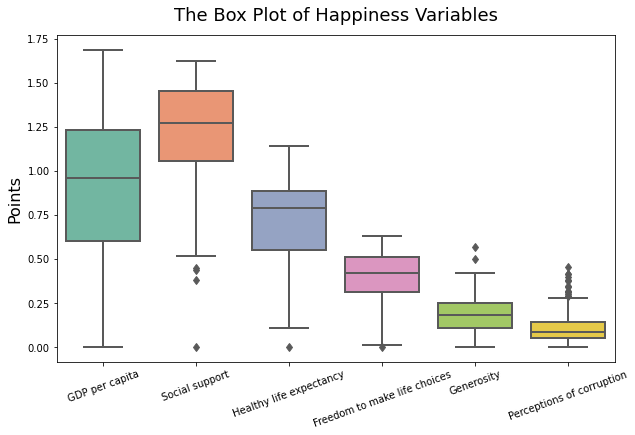

In [9]:
# Set the figure size
plt.figure(figsize = (10,6))

# Plot
ax= sns.boxplot(data=df[columns], linewidth=2,fliersize=6, palette="Set2")

# Set the chart style
sns.set_theme(style='whitegrid')

# Set the title, the labels, and custom ticks
plt.title('The Box Plot of Happiness Variables', fontsize = 18, pad=15)
ax.set_xlabel("")
ax.set_ylabel("Points", fontsize=16, labelpad=5)
plt.setp(ax.get_xticklabels(), rotation=20)
# Show the plot
plt.show()

In [10]:
df_melt = pd.melt(df, id_vars=['Country or region'], 
                  value_vars=columns, 
                  var_name='variable', 
                  value_name='point')
df_melt.head()

,Country or region,variable,point
0,Finland,GDP per capita,1.340
1,Denmark,GDP per capita,1.383
2,Norway,GDP per capita,1.488
3,Iceland,GDP per capita,1.380
4,Netherlands,GDP per capita,1.396


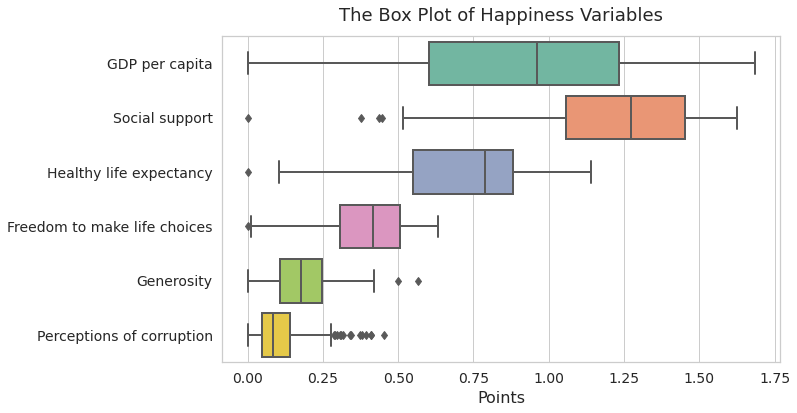

In [11]:
# Set the figure size
plt.figure(figsize = (10,6))

# Plot
ax = sns.boxplot(x='point', y='variable', data=df_melt, linewidth=2, fliersize=6, palette='Set2')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title('The Box Plot of Happiness Variables', fontsize = 18, pad=15)
ax.tick_params(labelsize=14)
ax.set_xlabel("Points", fontsize=16, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

# Show the plot
plt.show()

The variable with the most outliers is "Perceptions of corruption". For this dataset, the outliers are countries with **high trust in their government/ lower corruption**.

We can quickly visualize the top 10 and bottom 10 happiest nations with a simple barplot.

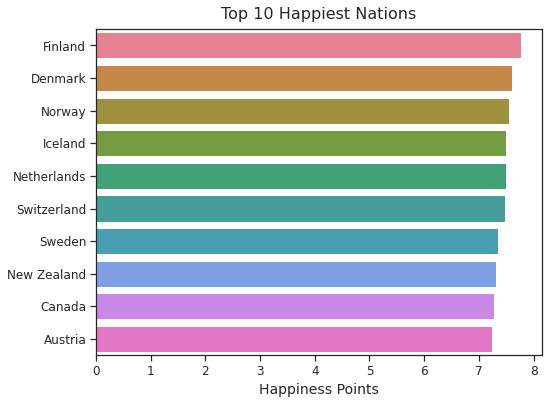

In [12]:
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Score', y='Country or region', data=df.head(10), palette='husl')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top 10 Happiest Nations", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

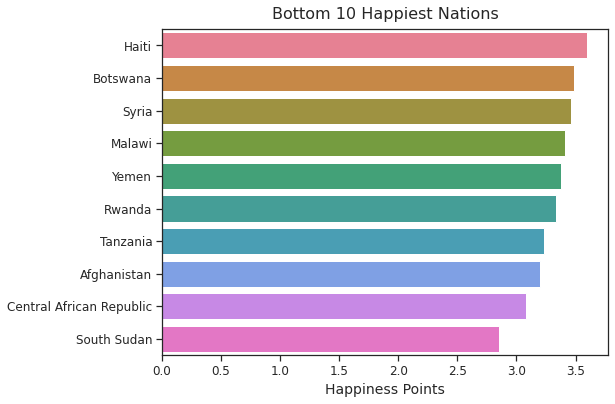

In [13]:
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Score', y='Country or region', data=df.tail(10), palette='husl')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Bottom 10 Happiest Nations", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

# Score Analysis
The most important index in our dataset is the score. From the `.describe()` we see that the 'Score' column is a float object. We will run a quick check on the values to determine the best approach.

In [14]:
len(df["Score"].unique())

155

With 155 unique values out of 156 entries, it may be difficult to run visualizations, especially for univariate analysis. The data will be momentarily rounded to two decimal points in hopes of capturing the uniqueness of the score without returning flat observations.

In [15]:
df["Score"].round(2).value_counts().head()

5.89    4
5.21    3
5.26    2
5.65    2
6.10    2
Name: Score, dtype: int64

With a mode of 5.89 and a mean value of 5.41, the distribution is positively skewed, but just barely.

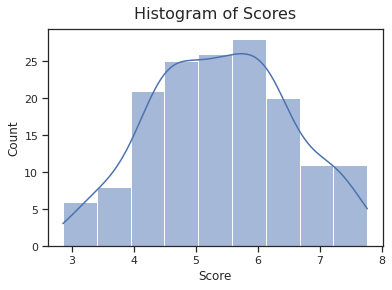

In [16]:
# Plot
sns.histplot(df["Score"], kde = True)

# Set the title, the labels, and custom ticks

plt.title("Histogram of Scores", fontsize=16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("Count", fontsize=14, labelpad=5)
ax.tick_params(labelsize=12)

#Show the plot
plt.show()

Increasing the bin size reveals a grouped pattern in the data distribution. The reasons behind it could be many, such as groups sharing similar GDP, cultural mindset, political status...

Different indexes may have different weights when calculating the score (as [This kaggle user](https://www.kaggle.com/lostinworlds) points out, the score is not a mere sum of the other indexes). 

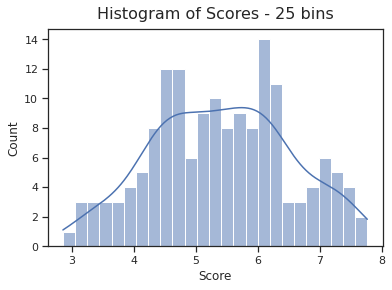

In [17]:
# Plot
sns.histplot(df["Score"], kde = True, bins = 25)

# Set the title, the labels, and custom ticks

plt.title("Histogram of Scores - 25 bins", fontsize=16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("Count", fontsize=14, labelpad=5)
ax.tick_params(labelsize=12)

#Show the plot
plt.show()

# Dataset Correlation

A correlation heatmap shows how different indexes relate to each other. **GDP per Capita, Social Support, and Healthy life Expectancy** indexes have the highest correlation with the happiness score.

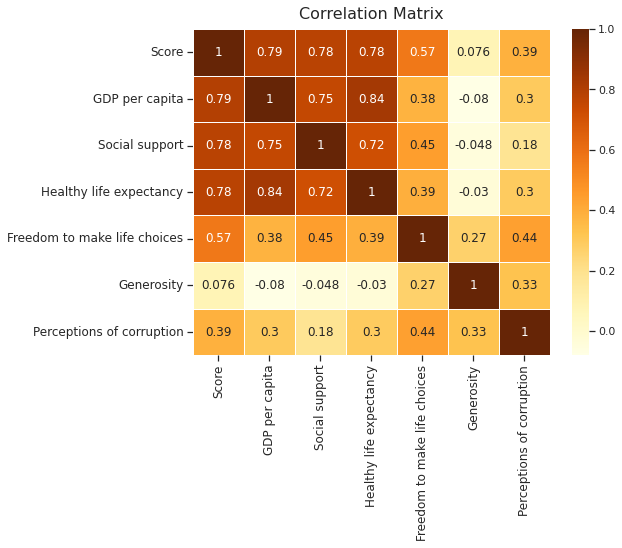

In [18]:
# Correlation between variables
corr = df.corr()

# Set the figure size
plt.figure(figsize = (8,6))

# Set the color pallet
cmap = sns.color_palette("YlOrBr", as_cmap=True)

# Plot 
ax = sns.heatmap(corr, cbar=True, annot=True, annot_kws={"size":12},
                 cmap=cmap, linewidths=1, linecolor='white')

# Set the title, the labels, and custom ticks
plt.title('Correlation Matrix', fontsize = 16, pad=10)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()


A more visual approach (separated per group)

<Figure size 576x432 with 0 Axes>

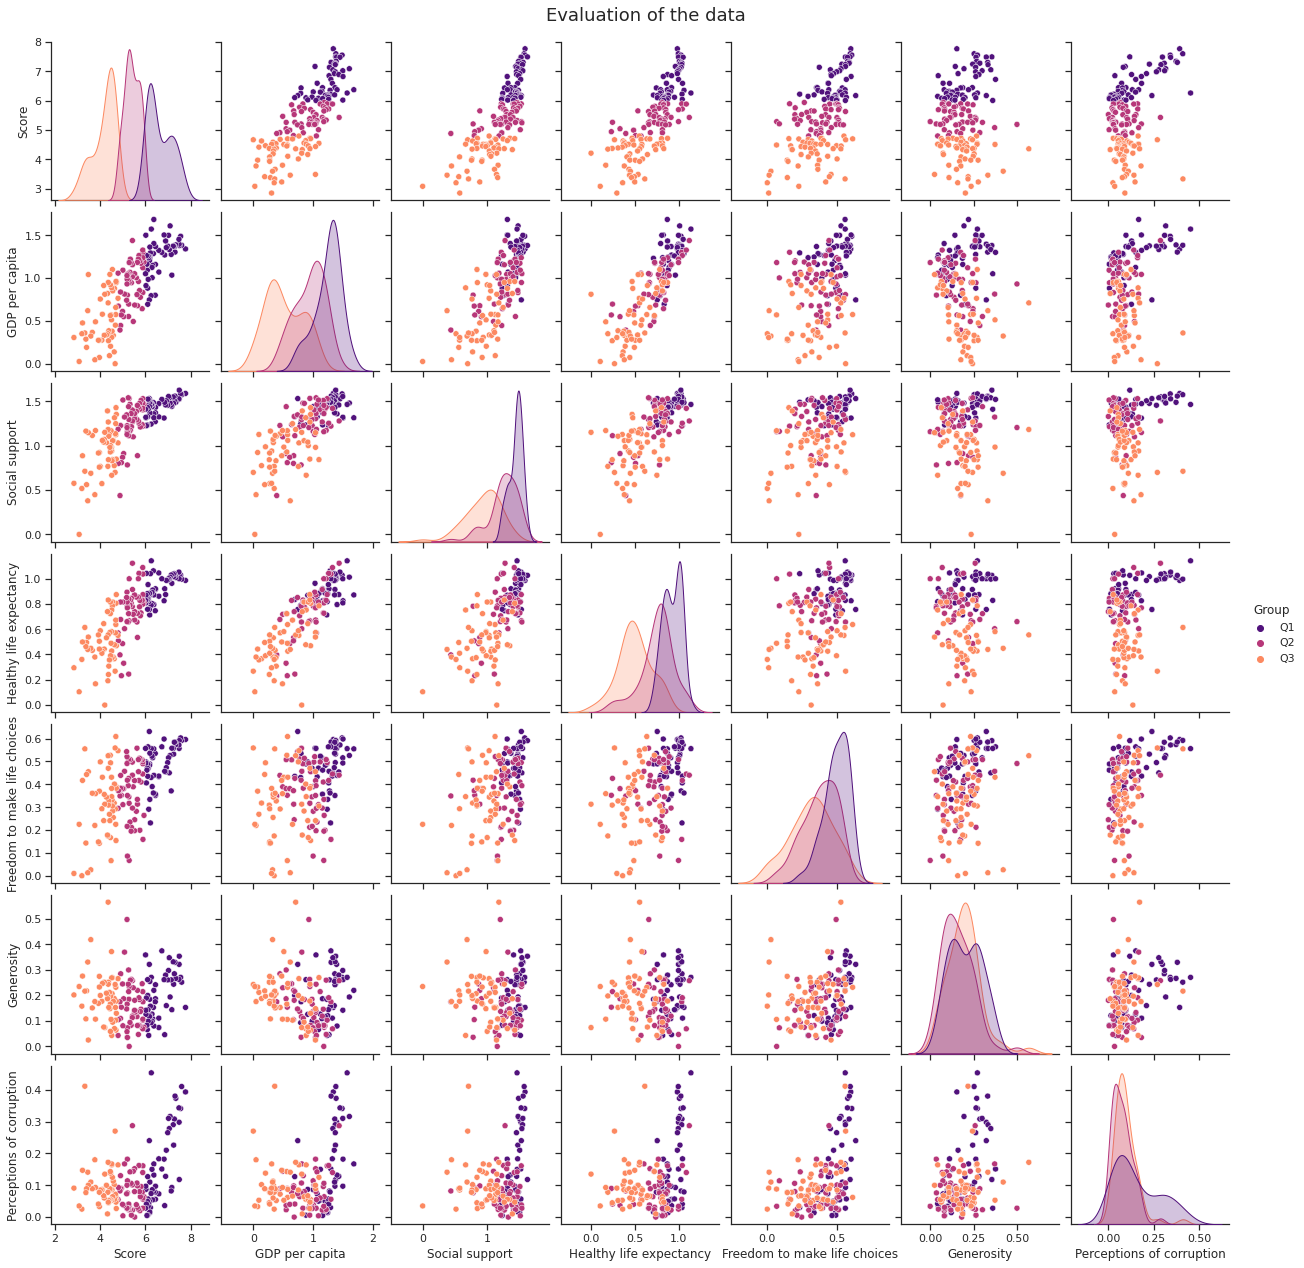

In [19]:
Group = np.repeat(np.array(['Q1','Q2','Q3']), [52,52,52], axis=0) 
Group= pd.Series(Group)

pair_plot_data = df
pair_plot_data['Group']= Group
                    
# Set the figure size
plt.figure(figsize = (8,6))

# Plot 
sns.pairplot(data=pair_plot_data, hue='Group', palette='magma');

# Set the title, the labels, and custom ticks
plt.suptitle("Evaluation of the data", fontsize = 18, y = 1.01)

# Show the plot
plt.show()

Another way of visualizing it is by restricting the correlation matrix to interactions between the Happiness Score and the other features.


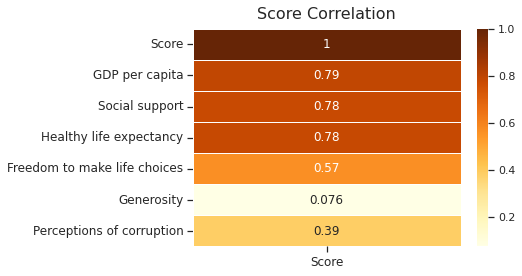

In [20]:
# Score correlation
corr_score = corr[['Score']]

# Set the color pallet
cmap = sns.color_palette("YlOrBr", as_cmap=True)

# Plot 
ax = sns.heatmap(corr_score, cbar=True, annot=True, annot_kws={"size":12},
                 cmap=cmap, linewidths=1, linecolor='white')

# Set the title, the labels, and custom ticks
plt.title('Score Correlation', fontsize = 16, pad=10)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()


In [21]:
import plotly.express as px
corr_score = corr[['Score']]
corr_score = corr_score.drop(['Score'])

# Plot 
fig = px.line_polar(corr_score, r = 'Score', theta = corr_score.index,line_close=True,title = 'How the factors can explained the Happiness Score')

# Show the plot
fig.show()


# Impact of GDP on Happiness Score
The 'GDP per capita' and 'Score' correlation is the highest one in our matrix (0.79). Here we plot a jointplot to see how the data points spread around a linear model fit.

<Figure size 576x432 with 0 Axes>

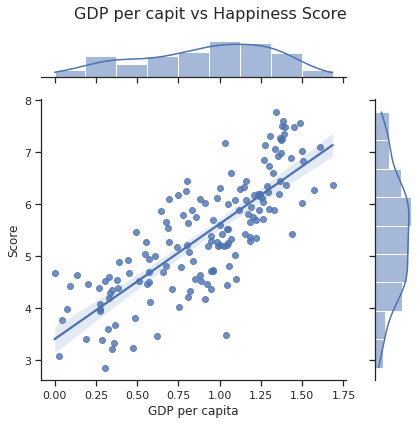

In [22]:
# Set the figure size
plt.figure(figsize = (8,6))

# Plot 
ax = sns.jointplot( x="GDP per capita",y='Score',data=df,kind='reg' )

# Set the title, the labels, and custom ticks
plt.suptitle('GDP per capit vs Happiness Score', fontsize = 16)
plt.tight_layout()

# Show the plot
plt.show()

The graph shows that the error increases at the extremities, revealing that even though the two features have a strong linear dependency, it fits better for midpoints. A possible explanation can be found in [this article](https://www.pnas.org/doi/10.1073/pnas.1011492107). The study suggests that emotional well-being rises with income only to an annual salary of $75,000.

We can check if the top 10 highest GDP matches our top 10 happiest nations

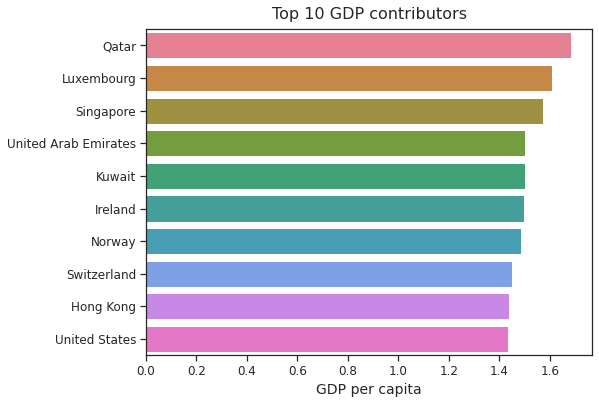

In [23]:
top_gdp = df.sort_values(by='GDP per capita', ascending=False)
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='GDP per capita', y='Country or region', data=top_gdp.head(10), palette='husl')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top 10 GDP contributors", fontsize = 16, pad=10)
ax.set_xlabel("GDP per capita", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

Only 2 of the top 10 happiest nations make part of the top 10 highest GDP per capita. That goes together with the increased error towards the extremities in the previous plot.
We can do the same for Social Support and Healthy Life Expectancy.

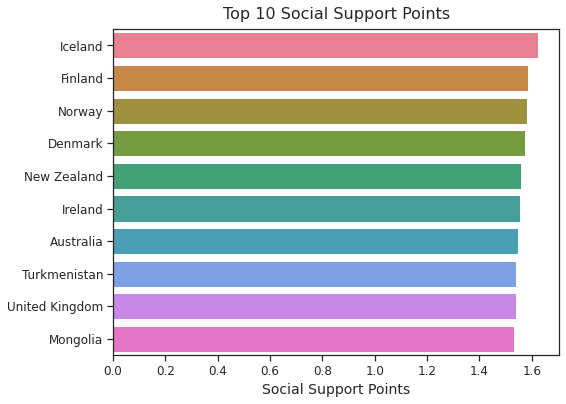

In [24]:
top_social = df.sort_values(by='Social support', ascending=False)
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Social support', y='Country or region', data=top_social.head(10), palette='husl')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top 10 Social Support Points", fontsize = 16, pad=10)
ax.set_xlabel("Social Support Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

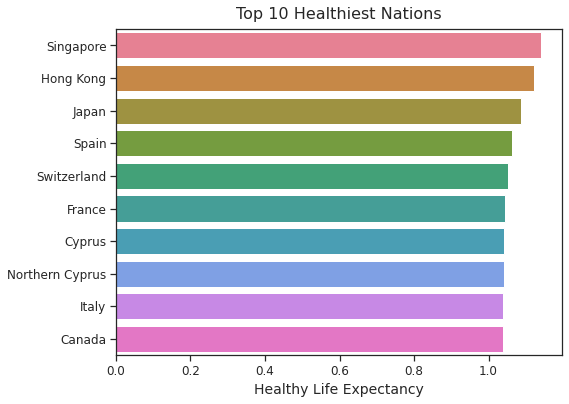

In [25]:
top_health = df.sort_values(by='Healthy life expectancy', ascending=False)
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Healthy life expectancy', y='Country or region', data=top_health.head(10), palette='husl')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top 10 Healthiest Nations", fontsize = 16, pad=10)
ax.set_xlabel("Healthy Life Expectancy", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

<Figure size 576x432 with 0 Axes>

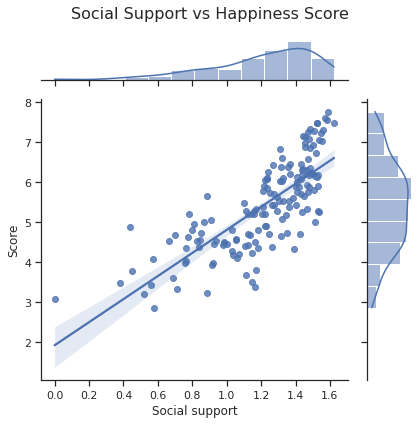

In [26]:
# Set the figure size
plt.figure(figsize = (8,6))

# Plot 
ax = sns.jointplot( x="Social support",y='Score',data=df,kind='reg' )

# Set the title, the labels, and custom ticks
plt.suptitle('Social Support vs Happiness Score', fontsize = 16)
plt.tight_layout()

# Show the plot
plt.show()

The top 10 nations with the highest social support points have more matches with the top 10 happiest nations list. That agrees with the linear regression fit calculated over the data, where the error increases more expressively towards to bottom extremity only.


In [27]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(df, locations='Country or region',
                    locationmode = "country names",
                    color="Score",
                    hover_name = 'Country or region',
                    hover_data={'Country or region':False,
                                'Overall rank': True
                               }
                   )
fig.update_layout(width=900, height=400, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Conclusion

Although subjective, happiness seems to be the result of contributions from different sources. The analysis shows that economic power influences happiness strongly, but only to a ceiling. This makes sense when we think about Maslow's pyramid of needs, which says that basic needs, such as safety and physiological needs are of higher priority. Once those needs are met, however, psychological needs, like social support and freedom, take precedence.